In [1]:
import utility_common as common
from utility_dfcutter import *
from torch_model import *

In [2]:
X = tc.from_numpy( np.load(common.getBaseDirectory() + "data/templates/templatesX_{}.npy".format('')) ).type(tc.FloatTensor)
Y = tc.from_numpy( np.load(common.getBaseDirectory() + "data/templates/templatesY_{}.npy".format('')) ).type(tc.FloatTensor)
#Y = tc.sum(X,1)

In [5]:
model     = PredictiveModel()
optimizer = torch.optim.LBFGS(model.parameters(),
                              lr=0.001, max_iter=1e4, 
                              tolerance_grad=1e-06, 
                              tolerance_change=1e-12, 
                              history_size=100) 

In [6]:
def closure():
    optimizer.zero_grad()
    y,regu = model.forward(X)
    loss = tc.sum( (y-Y)**2/(2*Y) ) + regu
    loss.backward(retain_graph=True)    
    return loss
optimizer.step(closure)

params = dict(model.named_parameters())
bwe = params['layer_beta.bwe'].data
bwm = params['layer_beta.bwm'].data
bwt = params['layer_beta.bwt'].data
print(bwe,bwm,bwt)

tensor(0.1086) tensor(0.1085) tensor(0.1064)


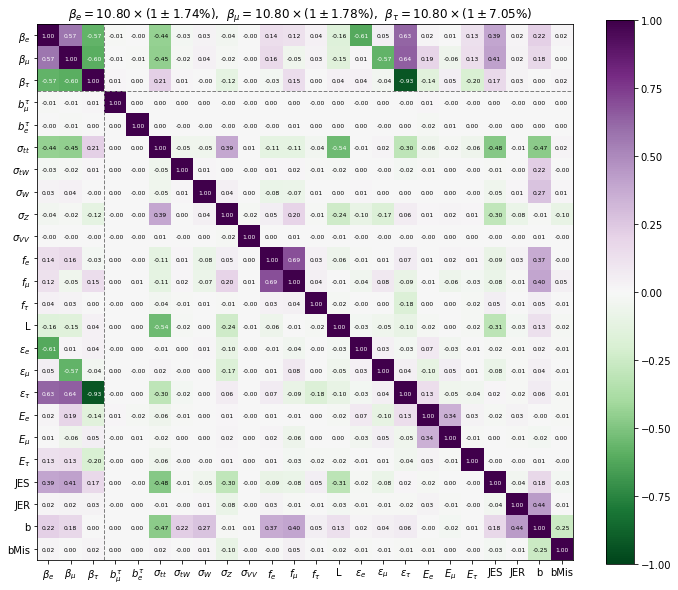

In [7]:
y,regu = model.forward(X)
loss = tc.sum( (y-Y)**2/(2*Y) ) + regu
    
hess = calculate_hessian(loss, model)
hessinv = np.linalg.inv(hess)
sigma   = np.sqrt(hessinv.diagonal())
corr  = hessinv/np.outer(sigma, sigma)

common.showParameterCovMat(corr,sigma)

In [8]:
print(sigma[0:3]/0.1080*100)
print(sigma[3:])

[1.7394958 1.7781864 7.0533276]
[0.00199988 0.00199967 0.029984   0.04986711 0.04869897 0.03581872
 0.09997848 0.20127921 0.14441167 0.23621796 0.0222436  0.00977678
 0.0096045  0.04355613 0.6819621  0.9478659  0.99669653 0.8352508
 0.9861861  0.08483485 0.9916724 ]


In [11]:
# for name, param in model.named_parameters():
#     if param.requires_grad:
#         print(name,param.data)